In [1]:
import json
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
import cv2
from mpl_chord_diagram import chord_diagram

In [4]:
# Carregar o dataset
with open('../datasets/fg_dataset.pkl','rb') as f:
    data = pickle.load(f)

In [18]:
# Carregar o histórico do arquivo JSON
with open('../models/history.json', 'r') as f:
    historico = json.load(f)

In [5]:
(xt,yt),(teste,label) = data
# del xt
# del yt
teste = teste.astype('uint8')
teste = np.array([image.reshape((128, 128, 3)) for image in teste])

In [6]:
# Carregar o modelo treinado
GF_Model = load_model('../models/modeloNovo.keras')

# Fazer previsões
predictions = GF_Model.predict(teste)

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


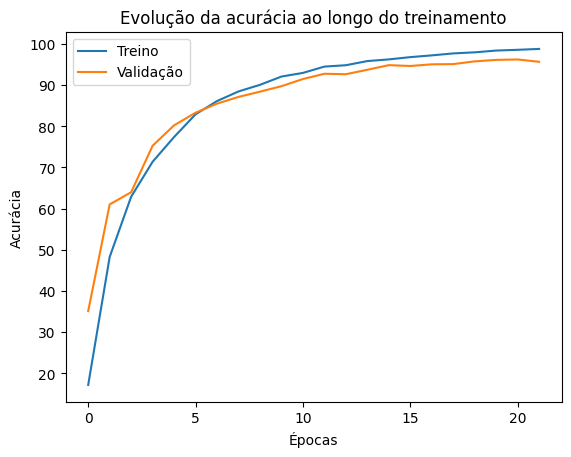

In [60]:
# Acurácia
plt.plot([x*100 for x in historico['accuracy']], label='Treino')
plt.plot([x*100 for x in historico['val_accuracy']], label='Validação')
plt.title('Evolução da acurácia ao longo do treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

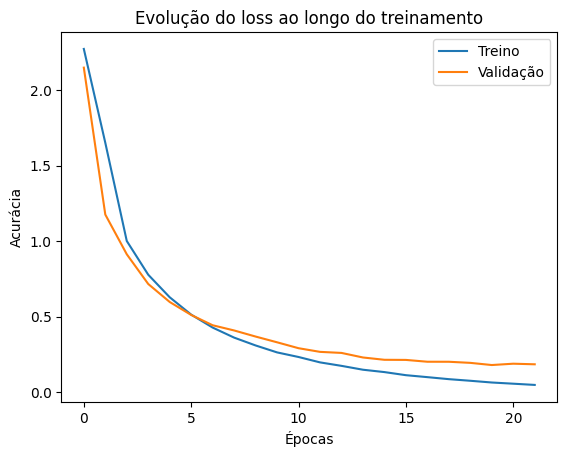

In [61]:
# Loss
plt.plot(historico['loss'], label='Treino')
plt.plot(historico['val_loss'], label='Validação')
plt.title('Evolução do loss ao longo do treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

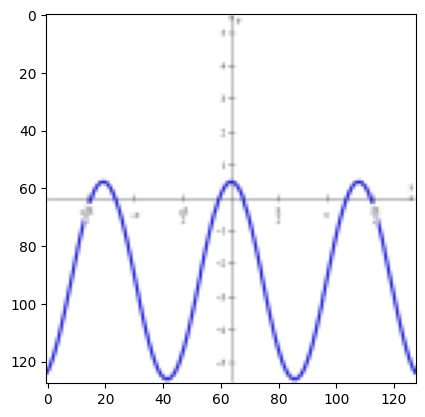

Previsão do modelo: cosseno
Resposta esperada: cosseno


In [9]:
# Visualizar  as imagens
img_nr = random.randint(0, teste.shape[0])

plt.imshow(teste[img_nr].reshape(128,128,3))
plt.show()

classes = {0:'linear', 1: 'quadrática', 2:'cúbica', 3:'exponencial', 4:'logarítmica',
                    5:'raíz', 6:'seno', 7:'cosseno', 8:'tangente', 9:'cotangente'}

print('Previsão do modelo:', classes[np.argmax(predictions[img_nr])])
print('Resposta esperada:' , classes[np.argmax(label[img_nr])])

In [85]:
# Ver resumo do modeo
GF_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,440,800 (74.16 MB)

 Trainable params: 6,480,266 (24.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,960,534 (49.44 MB)

In [10]:
# Plotar métricas 
y_true= [np.argmax(x) for x in label]
y_pred= [np.argmax(x) for x in predictions]
matriz_de_confusao = confusion_matrix(y_true, y_pred)
acuracia = accuracy_score(y_true, y_pred)
# f1score = f1_score(y_true, y_pred)

In [11]:
acuracia*100

97.58620689655172

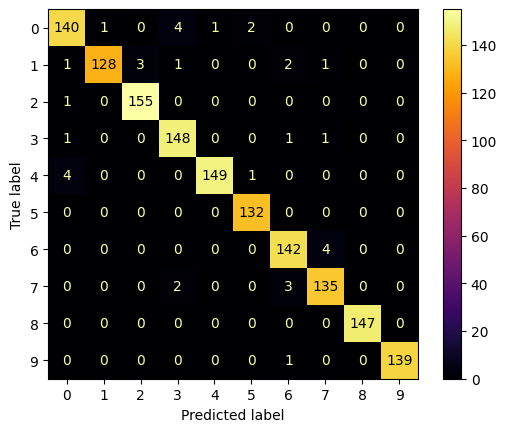

In [12]:
# Matriz de confusao 
cm_disp =ConfusionMatrixDisplay(matriz_de_confusao)
cm_disp.plot(cmap='inferno')
plt.show()

<h4 style=color:magenta>Legenda</h4>
<ul>
<li>0 -linear, 1 - quadrática, 2 - cúbica, 3 - exponencial , 4 - logarítmica</li>

<li>5 - raíz quadrada, 6 - seno, 7 - cosseno, 8 - tangente, 9 - cotangente</li>
</ul>


In [13]:
# Verificar onde cada funcao se confunde com a outra
'''
na variavel pred trocar o numero pela labels correspondente no predicted labels
na variavel lbl trocar o numero pela labels correspondente no true label
''' 
from time import sleep
from IPython.display import clear_output

errors=[]
i=0
for pred, lbl in zip([np.argmax(x) for x in predictions], [np.argmax(x) for x in label]):
    if pred==2 and lbl==1:
        errors.append(i)
    i+=1


In [14]:
err=0
errors

[59, 362, 368]

In [18]:
# Visualizar os gráficos

clear_output(wait=True)

plt.imshow(teste[errors[err]])
plt.show()

classes = {0:'linear', 1: 'quadrática', 2:'cúbica', 3:'exponencial', 4:'logarítmica',
                    5:'raíz quadrada', 6:'seno', 7:'cosseno', 8:'tangente', 9:'cotangente'}

print('Previsão do modelo:', classes[np.argmax(predictions[errors[err]])])
print('Resposta esperada:' , classes[np.argmax(label[errors[err]])])
err+=1

IndexError: list index out of range

<h3 style=color:magenta>Fazer previsão com Imagens da internet</h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


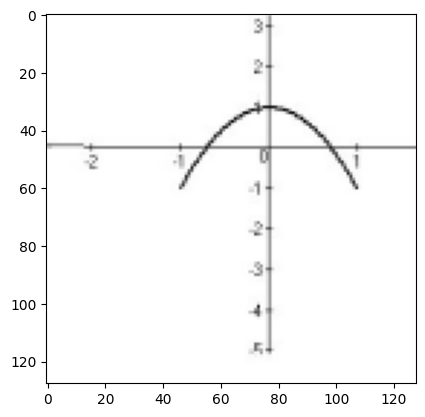

É uma função  cúbica


In [82]:
# Visualizar  as imagens
imagem = cv2.imread('quadratica4.jpg')
imagem=cv2.resize(imagem,(128,128), interpolation = cv2.INTER_AREA)
discover = np.argmax( GF_Model.predict(imagem.reshape(1,128,128,3)) )

plt.imshow(imagem)
plt.show()

classes = {0:'linear', 1: 'quadrática', 2:'cúbica', 3:'exponencial', 4:'logarítmica',
                    5:'raíz', 6:'seno', 7:'cosseno', 8:'tangente', 9:'cotangente'}

print('É uma função ', classes[discover])

In [89]:
# Plotar Diagrama de cordas 
# zerar diagonal da matriz_de_confusao 
matriz_de_confusao_zerada=matriz_de_confusao.copy()

for i in range(matriz_de_confusao.shape[0]):
    for j in range(matriz_de_confusao.shape[1]):
        if i==j:
            matriz_de_confusao_zerada[i,j]=0
matriz_de_confusao_zerada

array([[0, 0, 0, 5, 1, 3, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [1, 0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

/Users/joaquimviana/Library/Python/3.9/lib/python/site-packages/mpl_chord_diagram/utilities.py:167: RuntimeWarning: invalid value encountered in divide
  return (mat[i, :] / x[i]) * (end - start)


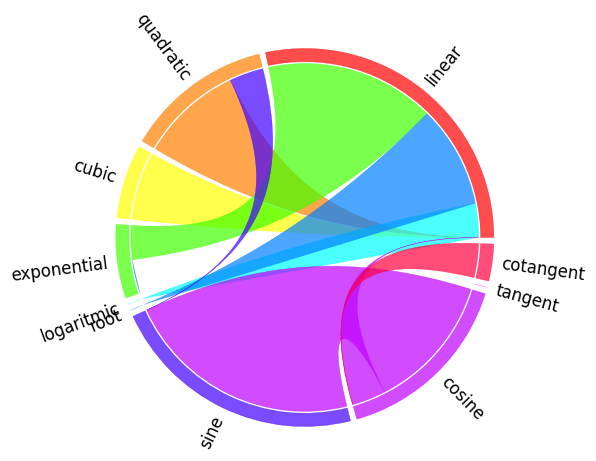

[(0.6607864106023295, 0.8160032595298193, -39.0),
 (-0.6270165212879257, 0.8422293523927958, 36.66666666666667),
 (-1.0023170138601187, 0.3128267950904059, 72.66666666666669),
 (-1.0414113691183249, -0.1340237302536241, -82.66666666666669),
 (-0.9824319916315081, -0.37057709294956215, -69.33333333333334),
 (-0.9689005665732146, -0.4046377294495706, -67.33333333333334),
 (-0.4547915251603116, -0.9463956195177352, -25.666666666666686),
 (0.733773117386295, -0.7510506056193542, 44.33333333333337),
 (1.012623927120686, -0.27765587013906223, 74.66666666666669),
 (1.0406140311077687, -0.14008011372653795, 82.33333333333337)]

In [90]:
# Indicar as legendas e as respectivas cores 
functions=['linear', 'quadratic','cubic', 'exponential', 'logaritmic','root', 'sine', 'cosine', 'tangent', 'cotangent']
cores=['#ff0000', '#ff8000','#ffff00', '#40ff00', '#00ffff','#0080ff', '#4000ff',  '#bf00ff', '#ff00bf','#ff0040']

chord_diagram(matriz_de_confusao_zerada, functions, colors=cores, chord_colors=cores, width=.07, pad=2, gap=.01, rotate_names=True, fontsize=12,show=True)